<a href="https://colab.research.google.com/github/hamzeh-khanpour/yy-interactions-at-the-LHeC/blob/main/Photon-Photon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-99ebb94eb3b3>:51: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
<ipython-input-12-99ebb94eb3b3>:51: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)


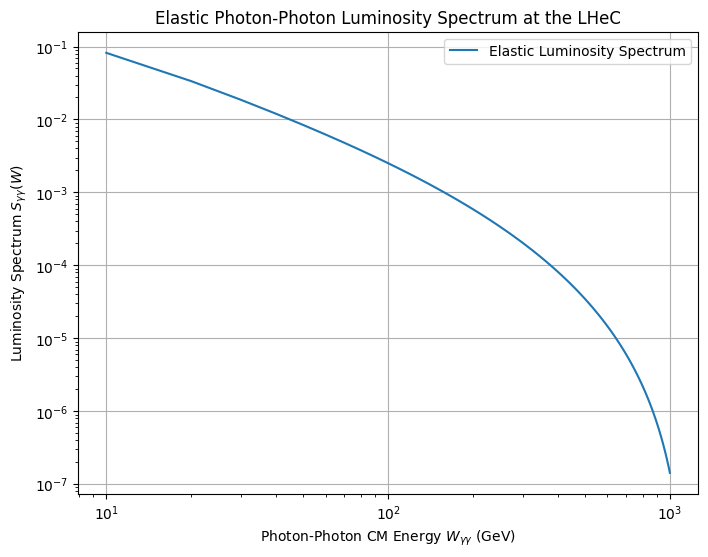

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
alpha = 1 / 137  # Fine-structure constant
M_p = 0.938  # Proton mass in GeV
mu_p = 2.7927  # Proton magnetic moment
m_pi0 = 0.135  # Neutral pion mass in GeV
m_e = 0.000511  # Electron mass in GeV
E_electron = 50  # Electron beam energy at the LHeC in GeV
E_proton = 7000  # Proton beam energy in GeV
s_ep = 4 * E_electron * E_proton  # CM energy squared of the ep system


# Proton form factors for elastic scattering (dipole approximation)
def G_E(Q2):
    return (1 + Q2 / 0.71)**(-2)


def G_M(Q2):
    return mu_p * G_E(Q2)


# Small cutoff to avoid division by zero
epsilon = 1e-8


# Electron Q2_min based on y_e and electron mass
def Q2_min_electron(y_e):
    if y_e >= 1 - epsilon:
        y_e = 1 - epsilon
    return (m_e**2 * y_e**2) / (1 - y_e)



# Proton Q2_min based on y_p and masses of proton and pion
def Q2_min_proton(y_p):
    if y_p >= 1 - epsilon:
        y_p = 1 - epsilon
    mMin2 = (M_p + m_pi0)**2
    return max(0, (mMin2 / (1 - y_p)) - M_p**2)



# Elastic photon flux for the proton
def phi_p(y, Q2_min, Q2_max):
    def integrand(Q2):
        return (G_E(Q2)**2 + (Q2 / (4 * M_p**2)) * G_M(Q2)**2) / Q2
    # Increase the limit to allow more subdivisions
    flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
    return (alpha / np.pi) * flux / y



# Photon flux for the electron
def phi_e(y, Q2_min, Q2_max):
    def integrand(Q2):
        return ((1 - y) * (1 - Q2_min / Q2) + y**2 / 2) / Q2
    if Q2_min >= Q2_max - epsilon:
        return 0  # Avoid invalid range for integration
    # Increase the limit to allow more subdivisions
    flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
    return (alpha / np.pi) * flux / y


# Luminosity spectrum calculation (elastic case)
def S_gamma_gamma(W, s_ep, Q2_max_e=100000, Q2_max_p=100000):
    luminosity = 0
    y_e_min = W**2 / s_ep  # Minimum y for the electron
    y_e_values = np.linspace(y_e_min, 1 - epsilon, 1000)

    for y_e in y_e_values:
        y_p = W**2 / (y_e * s_ep)

        # Calculate Q2_min for electron and proton based on y
        Q2_min_e = Q2_min_electron(y_e)
        Q2_min_p = Q2_min_proton(y_p)

        luminosity += phi_e(y_e, Q2_min_e, Q2_max_e) * phi_p(y_p, Q2_min_p, Q2_max_p) / y_e

    return 2 * W / s_ep * luminosity


# Parameters for photon virtualities
Q2_max_e = 100000  # Maximal photon virtuality for electron (GeV^2)
Q2_max_p = 100000   # Maximal photon virtuality for proton (GeV^2)

# Generate and plot the elastic photon-photon luminosity spectrum
W_values = np.linspace(10, 1000, 100)  # Photon-photon CM energy in GeV
luminosity_spectrum = [S_gamma_gamma(W, s_ep, Q2_max_e, Q2_max_p) for W in W_values]


# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, luminosity_spectrum, label=r'Elastic Luminosity Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Photon-Photon CM Energy $W_{\gamma\gamma}$ (GeV)')
plt.ylabel(r'Luminosity Spectrum $S_{\gamma\gamma}(W)$')
plt.title('Elastic Photon-Photon Luminosity Spectrum at the LHeC')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-13-5d95f490b27e>:58: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  flux, _ = quad(integrand, Q2_min, Q2_max)
<ipython-input-13-5d95f490b27e>:48: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  flux, _ = quad(integrand, Q2_min, Q2_max)
<ipython-input-13-5d95f490b27e>:48: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  fl

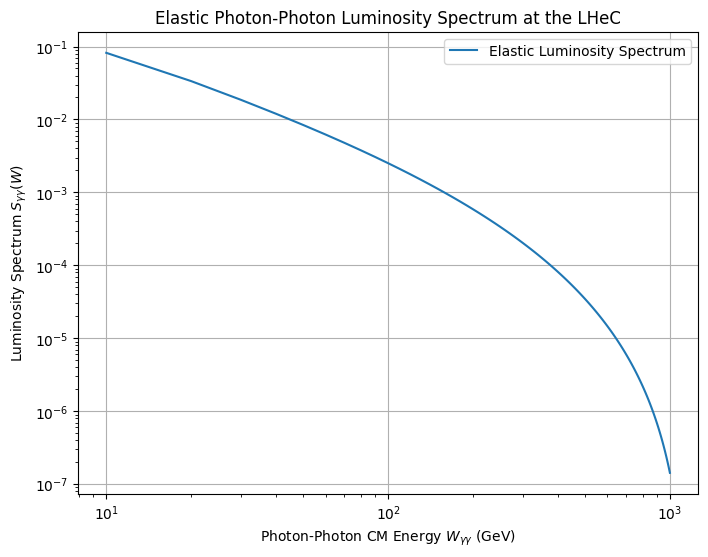

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
alpha = 1 / 137  # Fine-structure constant
M_p = 0.938  # Proton mass in GeV
mu_p = 2.7927  # Proton magnetic moment
m_pi0 = 0.135  # Neutral pion mass in GeV
m_e = 0.000511  # Electron mass in GeV
E_electron = 50  # Electron beam energy at the LHeC in GeV
E_proton = 7000  # Proton beam energy in GeV
s_ep = 4 * E_electron * E_proton  # CM energy squared of the ep system


# Proton form factors for elastic scattering (dipole approximation)
def G_E(Q2):
    return (1 + Q2 / 0.71)**(-2)


def G_M(Q2):
    return mu_p * G_E(Q2)


# Small cutoff to avoid division by zero
epsilon = 1e-8


# Electron Q2_min based on y_e and electron mass
def Q2_min_electron(y_e):
    if y_e >= 1 - epsilon:
        y_e = 1 - epsilon
    return (m_e**2 * y_e**2) / (1 - y_e)


# Proton Q2_min based on y_p and masses of proton and pion
def Q2_min_proton(y_p):
    if y_p >= 1 - epsilon:
        y_p = 1 - epsilon
    mMin2 = (M_p + m_pi0)**2
    return max(0, (mMin2 / (1 - y_p)) - M_p**2)


# Elastic photon flux for the proton
def phi_p(y, Q2_min, Q2_max):
    def integrand(Q2):
        return (G_E(Q2)**2 + (Q2 / (4 * M_p**2)) * G_M(Q2)**2) / Q2
    flux, _ = quad(integrand, Q2_min, Q2_max)
    return (alpha / np.pi) * flux / y


# Photon flux for the electron
def phi_e(y, Q2_min, Q2_max):
    def integrand(Q2):
        return ((1 - y) * (1 - Q2_min / Q2) + y**2 / 2) / Q2
    if Q2_min >= Q2_max - epsilon:
        return 0  # Avoid invalid range for integration
    flux, _ = quad(integrand, Q2_min, Q2_max)
    return (alpha / np.pi) * flux / y


# Luminosity spectrum calculation (elastic case)
def S_gamma_gamma(W, s_ep, Q2_max_e=100000, Q2_max_p=100000):
    luminosity = 0
    y_e_min = W**2 / s_ep  # Minimum y for the electron
    y_e_values = np.linspace(y_e_min, 1 - epsilon, 1000)


    for y_e in y_e_values:
        y_p = W**2 / (y_e * s_ep)


        # Calculate Q2_min for electron and proton based on y
        Q2_min_e = Q2_min_electron(y_e)
        Q2_min_p = Q2_min_proton(y_p)

        luminosity += phi_e(y_e, Q2_min_e, Q2_max_e) * phi_p(y_p, Q2_min_p, Q2_max_p) / y_e

    return 2 * W / s_ep * luminosity


# Parameters for photon virtualities
Q2_max_e = 100000  # Maximal photon virtuality for electron (GeV^2)
Q2_max_p = 100000   # Maximal photon virtuality for proton (GeV^2)

# Generate and plot the elastic photon-photon luminosity spectrum
W_values = np.linspace(10, 1000, 100)  # Photon-photon CM energy in GeV
luminosity_spectrum = [S_gamma_gamma(W, s_ep, Q2_max_e, Q2_max_p) for W in W_values]


# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, luminosity_spectrum, label=r'Elastic Luminosity Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Photon-Photon CM Energy $W_{\gamma\gamma}$ (GeV)')
plt.ylabel(r'Luminosity Spectrum $S_{\gamma\gamma}(W)$')
plt.title('Elastic Photon-Photon Luminosity Spectrum at the LHeC')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-14-1c996654083b>:43: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
<ipython-input-14-1c996654083b>:43: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)


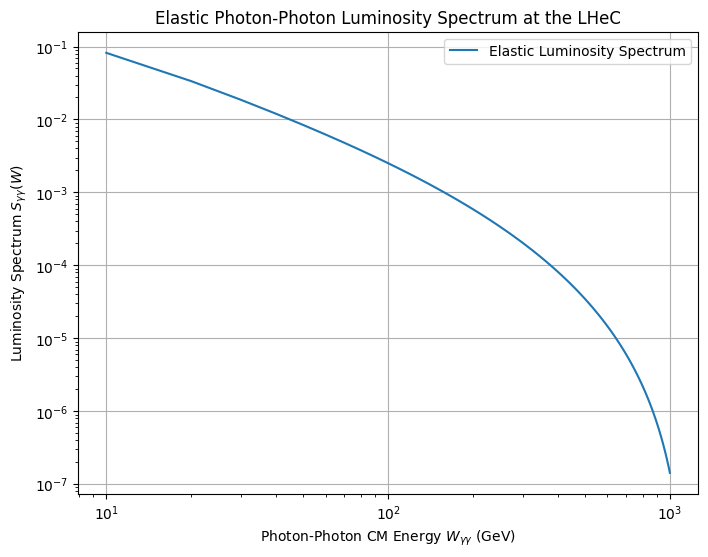

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
alpha = 1 / 137  # Fine-structure constant
M_p = 0.938  # Proton mass in GeV
mu_p = 2.7927  # Proton magnetic moment
m_pi0 = 0.135  # Neutral pion mass in GeV
m_e = 0.000511  # Electron mass in GeV
E_electron = 50  # Electron beam energy at the LHeC in GeV
E_proton = 7000  # Proton beam energy in GeV
s_ep = 4 * E_electron * E_proton  # CM energy squared of the ep system


# Proton form factors for elastic scattering (dipole approximation)
def G_E(Q2):
    return (1 + Q2 / 0.71)**(-2)

def G_M(Q2):
    return mu_p * G_E(Q2)

# Small cutoff to avoid division by zero
epsilon = 1e-8


# Electron Q2_min based on y_e and electron mass
def Q2_min_electron(y_e):
    if y_e >= 1 - epsilon:
        y_e = 1 - epsilon
    return (m_e**2 * y_e**2) / (1 - y_e)


# Proton Q2_min based on y_p and masses of proton and pion
def Q2_min_proton(y_p):
    if y_p >= 1 - epsilon:
        y_p = 1 - epsilon
    mMin2 = (M_p + m_pi0)**2
    return max(0, (mMin2 / (1 - y_p)) - M_p**2)



# Elastic photon flux for the proton
def phi_p(y, Q2_min, Q2_max):
    def integrand(Q2):
        return (G_E(Q2)**2 + (Q2 / (4 * M_p**2)) * G_M(Q2)**2) / Q2
    # Increase the limit to allow more subdivisions
    flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
    return (alpha / np.pi) * flux / y



# Photon flux for the electron
def phi_e(y, Q2_min, Q2_max):
    def integrand(Q2):
        return ((1 - y) * (1 - Q2_min / Q2) + y**2 / 2) / Q2
    if Q2_min >= Q2_max - epsilon:
        return 0  # Avoid invalid range for integration
    # Increase the limit to allow more subdivisions
    flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
    return (alpha / np.pi) * flux / y



# Luminosity spectrum calculation (elastic case)
def S_gamma_gamma(W, s_ep, Q2_max_e=100000, Q2_max_p=100000):
    luminosity = 0
    y_e_min = W**2 / s_ep  # Minimum y for the electron
    y_e_values = np.linspace(y_e_min, 1 - epsilon, 1000)



    for y_e in y_e_values:
        y_p = W**2 / (y_e * s_ep)

        # Calculate Q2_min for electron and proton based on y
        Q2_min_e = Q2_min_electron(y_e)
        Q2_min_p = Q2_min_proton(y_p)

        luminosity += phi_e(y_e, Q2_min_e, Q2_max_e) * phi_p(y_p, Q2_min_p, Q2_max_p) / y_e

    return 2 * W / s_ep * luminosity



# Parameters for photon virtualities
Q2_max_e = 100000  # Maximal photon virtuality for electron (GeV^2)
Q2_max_p = 100000   # Maximal photon virtuality for proton (GeV^2)




# Generate and plot the elastic photon-photon luminosity spectrum
W_values = np.linspace(10, 1000, 100)  # Photon-photon CM energy in GeV
luminosity_spectrum = [S_gamma_gamma(W, s_ep, Q2_max_e, Q2_max_p) for W in W_values]



# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, luminosity_spectrum, label=r'Elastic Luminosity Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Photon-Photon CM Energy $W_{\gamma\gamma}$ (GeV)')
plt.ylabel(r'Luminosity Spectrum $S_{\gamma\gamma}(W)$')
plt.title('Elastic Photon-Photon Luminosity Spectrum at the LHeC')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-16-530ac1f2b205>:42: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
<ipython-input-16-530ac1f2b205>:42: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)


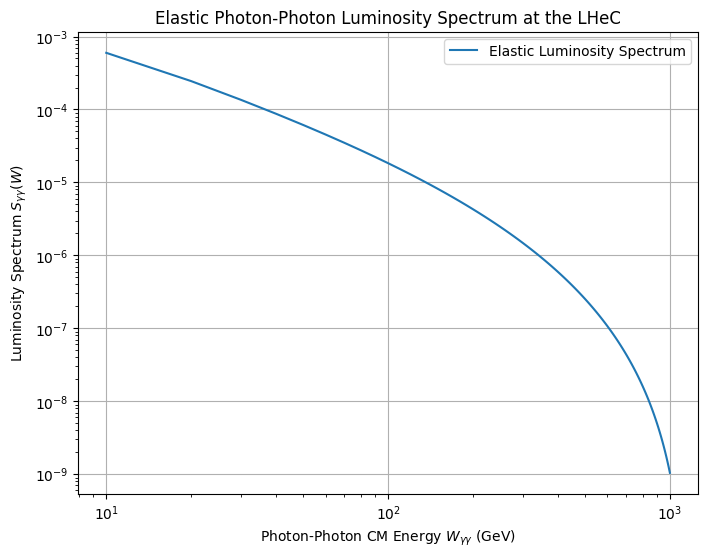

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
alpha = 1 / 137  # Fine-structure constant
M_p = 0.938  # Proton mass in GeV
mu_p = 2.7927  # Proton magnetic moment
m_pi0 = 0.135  # Neutral pion mass in GeV
m_e = 0.000511  # Electron mass in GeV
E_electron = 50  # Electron beam energy at the LHeC in GeV
E_proton = 7000  # Proton beam energy in GeV
s_ep = 4 * E_electron * E_proton  # CM energy squared of the ep system

# Proton form factors for elastic scattering (dipole approximation)
def G_E(Q2):
    return (1 + Q2 / 0.71)**(-2)

def G_M(Q2):
    return mu_p * G_E(Q2)

# Small cutoff to avoid division by zero
epsilon = 1e-8

# Electron Q2_min based on y_e and electron mass
def Q2_min_electron(y_e):
    if y_e >= 1 - epsilon:
        y_e = 1 - epsilon
    return (m_e**2 * y_e**2) / (1 - y_e)

# Proton Q2_min based on y_p and masses of proton and pion
def Q2_min_proton(y_p):
    if y_p >= 1 - epsilon:
        y_p = 1 - epsilon
    mMin2 = (M_p + m_pi0)**2
    return max(0, (mMin2 / (1 - y_p)) - M_p**2)

# Elastic photon flux for the proton
def phi_p(y, Q2_min, Q2_max):
    def integrand(Q2):
        return (G_E(Q2)**2 + (Q2 / (4 * M_p**2)) * G_M(Q2)**2) / Q2
    flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
    return (alpha / np.pi) * flux / y

# Photon flux for the electron
def phi_e(y, Q2_min, Q2_max):
    def integrand(Q2):
        return ((1 - y) * (1 - Q2_min / Q2) + y**2 / 2) / Q2
    if Q2_min >= Q2_max - epsilon:
        return 0  # Avoid invalid range for integration
    flux, _ = quad(integrand, Q2_min, Q2_max, limit=1000)
    return (alpha / np.pi) * flux / y

# Luminosity spectrum calculation (elastic case)
def S_gamma_gamma(W, s_ep, Q2_max_e=100000, Q2_max_p=100000):
    luminosity = 0
    y_e_min = W**2 / s_ep  # Minimum y for the electron
    y_e_values = np.linspace(y_e_min, 1 - epsilon, 1000)

    # Normalization factor
    normalization_factor = alpha  # Potential missing factor for the luminosity

    for y_e in y_e_values:
        y_p = W**2 / (y_e * s_ep)

        # Calculate Q2_min for electron and proton based on y
        Q2_min_e = Q2_min_electron(y_e)
        Q2_min_p = Q2_min_proton(y_p)

        luminosity += phi_e(y_e, Q2_min_e, Q2_max_e) * phi_p(y_p, Q2_min_p, Q2_max_p) / y_e

    return normalization_factor * 2 * W / s_ep * luminosity

# Parameters for photon virtualities
Q2_max_e = 100000  # Maximal photon virtuality for electron (GeV^2)
Q2_max_p = 100000   # Maximal photon virtuality for proton (GeV^2)

# Generate and plot the elastic photon-photon luminosity spectrum
W_values = np.linspace(10, 1000, 100)  # Photon-photon CM energy in GeV
luminosity_spectrum = [S_gamma_gamma(W, s_ep, Q2_max_e, Q2_max_p) for W in W_values]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, luminosity_spectrum, label=r'Elastic Luminosity Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Photon-Photon CM Energy $W_{\gamma\gamma}$ (GeV)')
plt.ylabel(r'Luminosity Spectrum $S_{\gamma\gamma}(W)$')
plt.title('Elastic Photon-Photon Luminosity Spectrum at the LHeC')
plt.grid(True)
plt.legend()
plt.show()
